# Dataset about breast cancer
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

link for more information: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

# Dropout

is a regularization technique used in deep neural networks to prevent overfitting. Here’s how it works:

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [5]:
features_cancer = pd.read_csv('entradas_breast.csv')
classes_cancer = pd.read_csv('saidas_breast.csv')

# in order to split in train and test
from sklearn.model_selection import train_test_split
features_train, features_test, classes_train, classes_test = train_test_split(features_cancer, classes_cancer, test_size=0.25)

In [6]:
features_cancer.shape

(569, 30)

In [7]:

classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu',
                    kernel_initializer='random_uniform',
                    input_dim= 30))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 16, activation = 'relu',
                    kernel_initializer='random_uniform'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                  metrics = ['binary_accuracy'])

classifier.fit(features_train,
               classes_train,
               batch_size = 10,
               epochs = 100)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.5585 - loss: 3.8458
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6046 - loss: 0.7706
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6033 - loss: 0.6126
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6207 - loss: 0.6088
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6570 - loss: 0.5551
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7011 - loss: 0.5864
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7033 - loss: 0.5097
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7203 - loss: 0.5165
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7605 - loss: 0.4972
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7001 - loss: 0.5242
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7474 - loss: 0.467

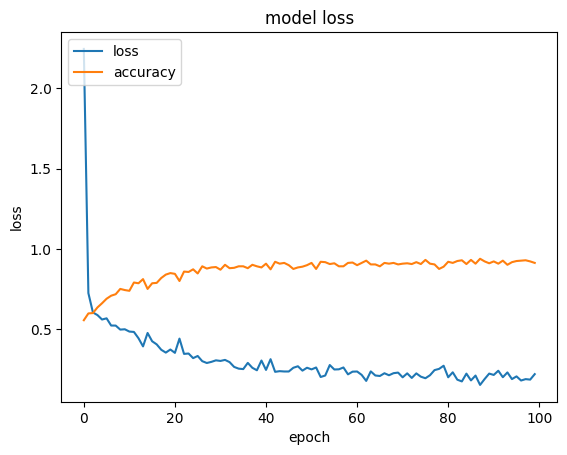

In [10]:

import matplotlib.pyplot as plt
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['binary_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
